# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#1
df = pd.read_csv('./data/college_completion.csv',low_memory=False)


In [11]:
#2
print( df.shape)
print( df.head())
#The dimensions are 3798 rows and 63 columns
#There are 3798 obersations
#some of the variables are city, state, and chronname

(3798, 63)
   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ... 

In [12]:
#3. Cross tabulate `control` and `level`. Describe the patterns you see.
print(pd.crosstab(df['control'],df['level']))
print(pd.crosstab(df['control'],df['level'], normalize = 'all'))

#More 2 year colleges are public than 4 year colleges because the public rate for 2-year is 24% while it is 16.6% for 4 year. Most institutions are private not for profit and 4 year colleges with 31%.


level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403


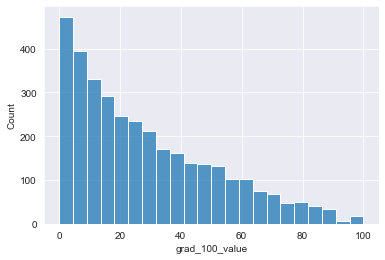

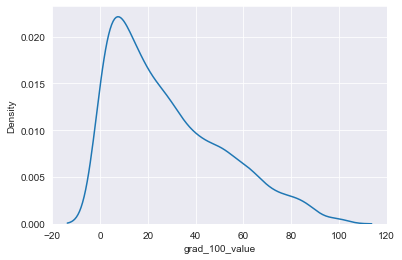

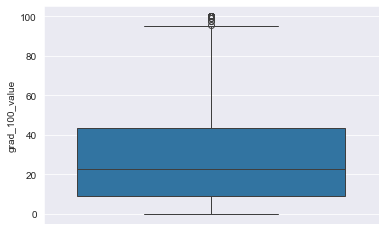

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

In [13]:
#4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
import seaborn as sns
plt.show(sns.histplot(df['grad_100_value']))
plt.show(sns.kdeplot(df['grad_100_value']))
plt.show(sns.boxplot(df['grad_100_value']))
df['grad_100_value'].describe()


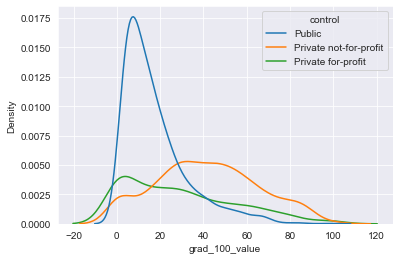

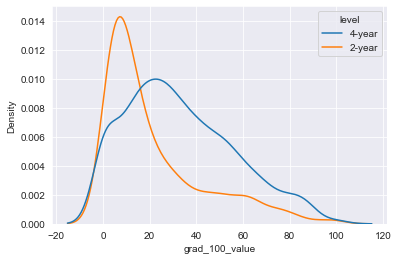

                       grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8  


grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

In [14]:
#5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
plt.show(sns.kdeplot(data=df,x='grad_100_value',hue='control'))
plt.show(sns.kdeplot(data=df,x='grad_100_value',hue='level'))
print(df.loc[:,['control','grad_100_value']].groupby('control').describe())
df.loc[:,['level','grad_100_value']].groupby('level').describe()
#The average 4 year graduation rate is higher than the 2 year graduation rate. The private not for profit graduation rate is also higher than the private for profit and the public rates.

<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

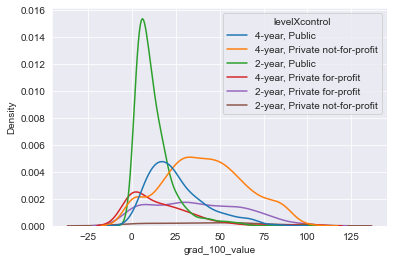

In [15]:
#6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']`. that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')
#the private for-profit 2-year programs have nearly double the graduation rate of private for-profit 4-year programs. There's little difference in graduation rates between 2-year and 4-year private non-profit schools, while public 2-year programs have the lowest rates overall.

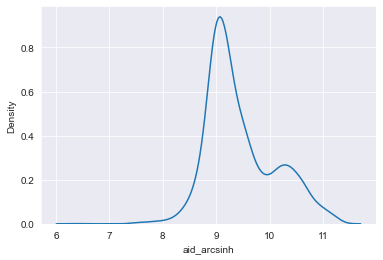

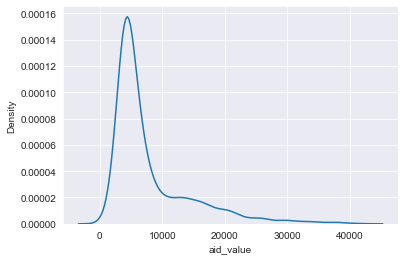

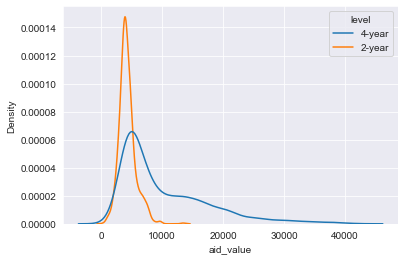

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [16]:
#7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
df['aid_arcsinh'] = np.arcsinh(df['aid_value'])
plt.show(sns.kdeplot(data=df,x='aid_arcsinh'))
plt.show(sns.kdeplot(data=df,x='aid_value'))
plt.show(sns.kdeplot(data=df,x='aid_value',hue='level'))
df.loc[:,['control','aid_value']].groupby('control').describe()
df.loc[:,['level','aid_value']].groupby('level').describe()

#private not for profit institutions give a lot more aid than public and for profit institutions. This would make sense since private schools are a lot more expensive and they are not making a profit so they can give away more money. Public and private for profit colleges give similar aid

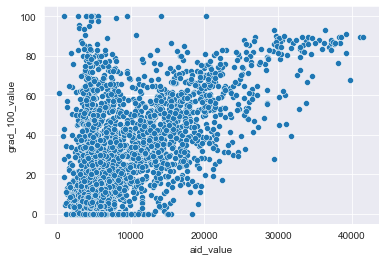

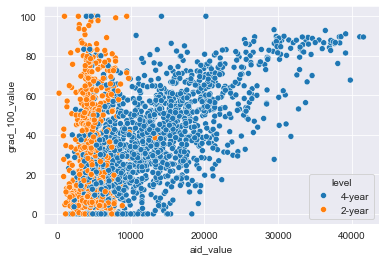

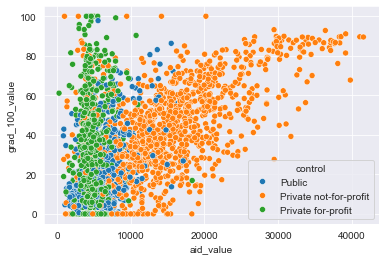

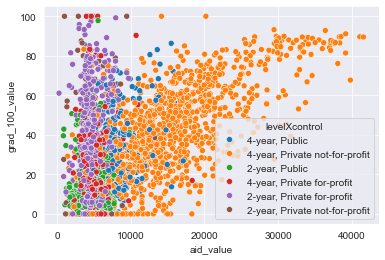

In [17]:
plt.show(sns.scatterplot(data=df,x='aid_value',y='grad_100_value'))
plt.show(sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level'))
plt.show(sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control'))
plt.show(sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='levelXcontrol'))
#The most positive correlation is the 4 year private not for profit institution. This means that 4 year private not for profit institutions give the most aid and have a higher 4 year graduation rate. 4 year public institutions also have high graduation rates but it is not as associated with the amount of aid given.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [30]:
#1. I am using the given dataset
#2.The data dictionary told me what each of the numeric values mean and it was basically a dictionary that said the number 1 means this and the number 2 means this and so on. Without this dictionary the data is unreadable. It did not say how missing data is handled
#I chose these variables because they had a lot of missing values which was interesting. I also thought that it was interesting to see these two since the first one is if the person has a private health insurance while the second variable is if the person is eligible for a dual medicare plan.
df = pd.read_csv('./data/sfpuf2021_1_fall.csv',low_memory=False)
df['INS_PRIVRX'].fillna(df['INS_PRIVRX'].median(), inplace=True) #replacing the missing data to its median
df['ADM_OP_MDCD'].fillna(df['ADM_OP_MDCD'].median(), inplace=True) #replacing the missing data to its median


C:\Users\Shruti Bala\AppData\Local\Temp\ipykernel_18736\430395555.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['INS_PRIVRX'].fillna(df['INS_PRIVRX'].median(), inplace=True) #replacing the missing data to its median
C:\Users\Shruti Bala\AppData\Local\Temp\ipykernel_18736\430395555.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obje

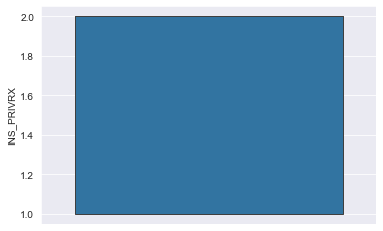

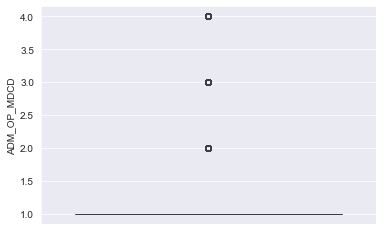

In [23]:
import seaborn as sns
#hi
sns.boxplot(df['INS_PRIVRX'])
plt.show()

sns.boxplot(df['ADM_OP_MDCD'])
plt.show()
#There do not seem to be any outliers in this data

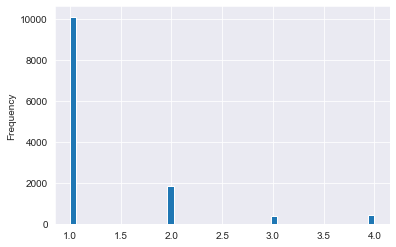

In [24]:
df['ADM_OP_MDCD'].plot(kind='hist', bins=50)
plt.show()

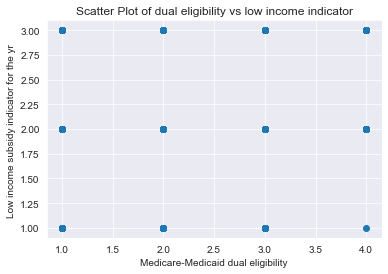

In [25]:
plt.scatter(df['ADM_OP_MDCD'], df['ADM_LIS_FLAG_YR'])
plt.xlabel('Medicare-Medicaid dual eligibility')
plt.ylabel('Low income subsidy indicator for the yr ')
plt.title('Scatter Plot of dual eligibility vs low income indicator')
plt.show()
#because there are only 4 options of what the data can be, the scatter plot does not tell us much valuable information. There seems to be no correlations

In [26]:
df[['ADM_OP_MDCD', 'ADM_LIS_FLAG_YR', 'INS_PRIVRX']].describe()
#it seems like the mean for all three of these categorices are pretty similar, being around 1.3 to 1.5. This menans that most of the respondents have dual elibility and are low income and also have a private plan. I thought that this was interesting since having a private plan usually means you are not low income so it was cool to see the similarities between this data.

,ADM_OP_MDCD,ADM_LIS_FLAG_YR,INS_PRIVRX
count,12783.000000,12783.000000,6135.000000
mean,1.308691,1.459204,1.554849
std,0.693641,0.832210,0.497023
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000
75%,1.000000,1.000000,2.000000
max,4.000000,3.000000,2.000000
